# Data & Things

## Lecture : IoT and Data

# Simulate sensor data & apply PCA

In this exercise, you will do the following:
1. Simulate sensor data
2. Apply PCA to simulated data
3. Simulate a new point
4. Find out which region the new point belongs to

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1 Simulate synthetic predictive maintenance dataset
np.random.seed(42)
time_steps = 10000

sensors = {}
for i in range(1, 21):
    sensors[f'Sensor{i}'] = np.linspace(50, 100, time_steps) + np.random.normal(0, 20, time_steps)

# Combine into a DataFrame
data = pd.DataFrame(sensors)

print("Sample Data:")
print(data.head())

Sample Data:
     Sensor1    Sensor2    Sensor3    Sensor4    Sensor5    Sensor6  \
0  59.934283  36.430105  56.965725  10.388561  40.562849  51.964123   
1  47.239714  43.895011  55.671472  28.905288  70.259050  48.722836   
2  62.963772  38.062380  31.279604  38.269433  46.046264  69.045816   
3  80.475599  52.223362  61.606686  53.008380  51.826387  80.671624   
4  45.336935  73.963573  20.218348  70.503249  64.367814  63.756941   

     Sensor7    Sensor8    Sensor9   Sensor10   Sensor11   Sensor12  \
0  51.576755  56.403048  63.280022  69.217891  70.611892  66.017477   
1  61.262950  72.314233  44.082680  42.605706  26.897905  49.021813   
2  56.832040  19.905237  48.678273  38.418383  61.518745  41.079748   
3  24.456718  84.807115  46.507354  68.681245  37.630232  53.375301   
4  46.295596  56.621738  60.301076  -4.610793  43.471946   7.484493   

    Sensor13   Sensor14   Sensor15   Sensor16   Sensor17   Sensor18  \
0  45.626995  72.350652  44.689254  77.397560  78.652455  13.5

In [3]:
# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Display scaled data
print("Scaled Data Sample:")
print(pd.DataFrame(scaled_data, columns=data.columns).head())

Scaled Data Sample:
    Sensor1   Sensor2   Sensor3   Sensor4   Sensor5   Sensor6   Sensor7  \
0 -0.610580 -1.566006 -0.725010 -2.596654 -1.407431 -0.927666 -0.969437   
1 -1.126525 -1.265030 -0.777771 -1.850742 -0.198347 -1.057996 -0.572396   
2 -0.487452 -1.500195 -1.772111 -1.473524 -1.184173 -0.240819 -0.754021   
3  0.224281 -0.929241 -0.535820 -0.879792 -0.948835  0.226649 -2.081098   
4 -1.203859 -0.052701 -2.223025 -0.175043 -0.438209 -0.453482 -1.185914   

    Sensor8   Sensor9  Sensor10  Sensor11  Sensor12  Sensor13  Sensor14  \
0 -0.746813 -0.479506 -0.232249 -0.186682 -0.367113 -1.184181 -0.110562   
1 -0.106939 -1.258090 -1.320570 -1.955170 -1.054209 -0.697301 -0.772550   
2 -2.214587 -1.071707 -1.491814 -0.554553 -1.375289 -0.412171 -0.701019   
3  0.395468 -1.159753 -0.254195 -1.520984 -0.878208 -1.964016 -1.982653   
4 -0.738018 -0.600323 -3.251518 -1.284652 -2.733470 -0.924990 -0.686938   

   Sensor15  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  
0 -1.220616  0

Do the following tasks:
1. Apply PCA with upto 5 components
2. Visualize how much variance of the dataset is defined by each component
3. Visualize the first 2 principal components and color them by timestep
4. Simulate a new position using code below
5. Plot the new point in the original 2D PCA graph

### 1. Apply PCA with upto 5 components

In [4]:
np.cov(scaled_data)

array([[ 0.57637784,  0.06306102,  0.05010322, ..., -0.15689025,
        -0.12262773,  0.06519734],
       [ 0.06306102,  0.4344126 , -0.1948659 , ..., -0.01389948,
         0.12766744, -0.09718368],
       [ 0.05010322, -0.1948659 ,  0.43921594, ...,  0.00676041,
        -0.12935257,  0.08722001],
       ...,
       [-0.15689025, -0.01389948,  0.00676041, ...,  0.30235679,
         0.06082665, -0.04691386],
       [-0.12262773,  0.12766744, -0.12935257, ...,  0.06082665,
         0.58200894, -0.13780667],
       [ 0.06519734, -0.09718368,  0.08722001, ..., -0.04691386,
        -0.13780667,  0.46565689]])

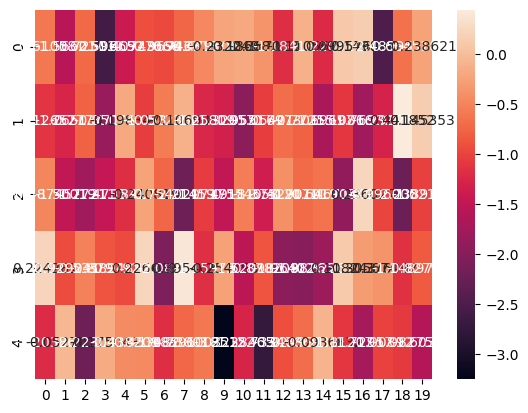

In [5]:
sns.heatmap(scaled_data[:5], annot=True, fmt='g')
plt.show()

In [6]:
pca = PCA(n_components=5)

principalComponents = pca.fit_transform(scaled_data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca 1', 'pca 2', 'pca 3', 'pca 4', 'pc 5'])

In [7]:
print(pca.explained_variance_ratio_)

[0.37687365 0.0359165  0.03507436 0.03489235 0.03428399]


In [8]:
print(pca.singular_values_)

[274.54458833  84.75435358  83.75483206  83.53724126  82.80579067]


In [9]:
pca.explained_variance_ratio_

array([0.37687365, 0.0359165 , 0.03507436, 0.03489235, 0.03428399])

### 2. Visualize how much variance of the dataset is defined by each component

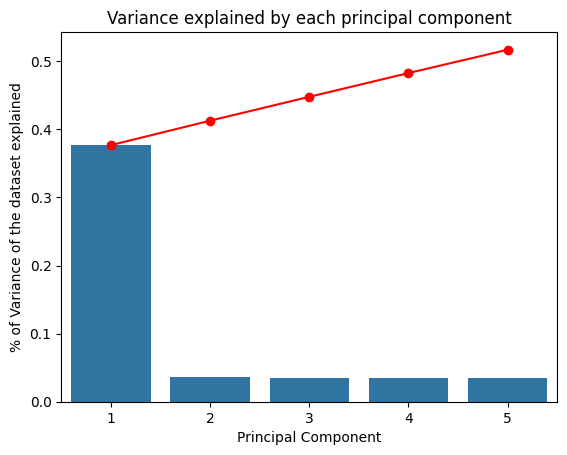

In [19]:
plt.plot(range(0, pca.n_components_), pca.explained_variance_ratio_.cumsum(), marker='o', color="red")
plt.xlabel('Principal Component')
plt.ylabel("% of Variance of the dataset explained")

sns.barplot(x=range(1, pca.n_components + 1), y=pca.explained_variance_ratio_)
plt.title("Variance explained by each principal component")
plt.show()

In [ ]:
principalDf

,pca 1,pca 2,pca 3,pca 4,pc 5
0,-3.697276,0.807661,0.827017,1.785296,-0.265841
1,-4.330366,0.303912,-0.256562,-0.264370,-1.273695
2,-4.869362,-0.678489,0.499375,0.677106,0.598557
3,-3.728347,0.066625,0.505255,0.944187,0.119946
4,-5.039456,-0.849799,-2.145603,-0.287005,0.598844
...,...,...,...,...,...
9995,5.057292,1.323372,-1.232449,0.109919,0.330081
9996,5.339193,-0.183616,-0.683768,-0.936819,0.348873
9997,3.741985,-0.655410,-0.832213,-0.215451,-0.084327
9998,4.459259,0.923429,0.036107,-1.146528,-0.542133


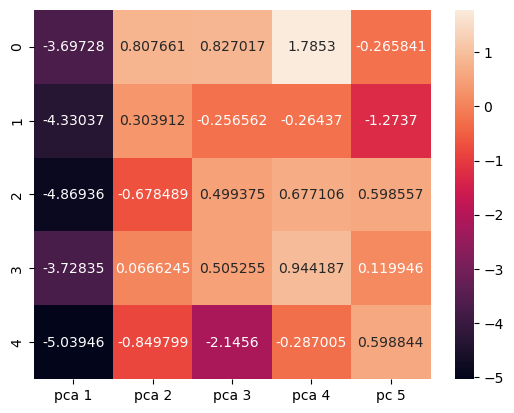

In [ ]:
sns.heatmap(principalDf[:5], annot=True, fmt='g')
plt.show()

### 3. Visualize the first 2 principal components and color them by timestep

In [ ]:
pca2 = PCA(n_components=2)

principal_components2 = pca2.fit_transform(scaled_data)

principalDf2 = pd.DataFrame(principal_components2, columns = ['pca 1', 'pca 2'])

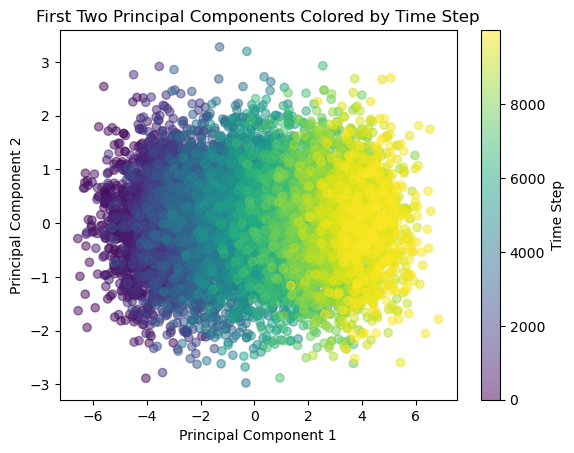

In [ ]:
pca_df = pd.DataFrame(principal_components2, columns=[f'PC{i+1}' for i in range(2)])
principalDf2['TimeStep'] = np.arange(time_steps)  # Add time information

scatter = plt.scatter(principalDf2['pca 1'], principalDf2['pca 2'], c=principalDf2['TimeStep'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label="Time Step")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("First Two Principal Components Colored by Time Step")
plt.show()

### 4. Simulate a new position using code below

In [ ]:
# Generate a new sensor reading (simulated)
new_point = np.array([np.random.uniform(50, 100) for _ in range(20)])

# Standardize the new point using the previously fitted scaler
new_point_scaled = scaler.transform(new_point.reshape(1, -1)) # throws warning, but still works

# Project the new point into PCA space
new_pca_point = pca2.transform(new_point_scaled) 

C:\Users\Bobby\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 5. Plot the new point in the original 2D PCA graph

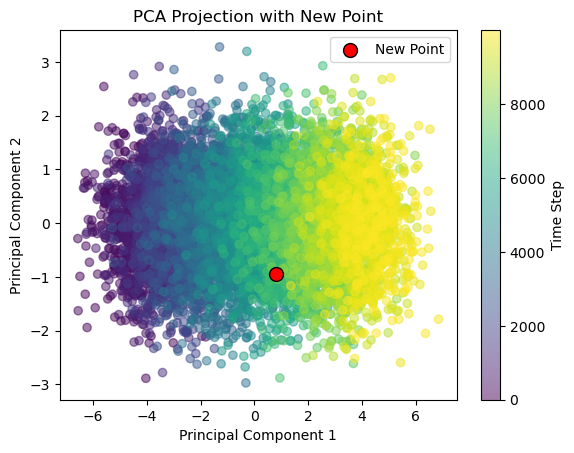

In [ ]:
scatter = plt.scatter(principalDf2['pca 1'], principalDf2['pca 2'], c=principalDf2['TimeStep'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label="Time Step")

# Plot the new point in red
plt.scatter(new_pca_point[0, 0], new_pca_point[0, 1], color='red', s=100, label="New Point", edgecolors='black')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection with New Point")
plt.legend()
plt.show()